In [79]:
import numpy as np
import matplotlib.pyplot as plt
from source import f
import math

# Simulation pour le cas 1D

### Test Case 1 

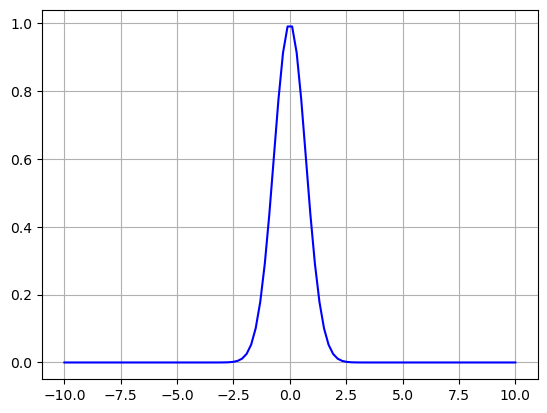

In [80]:
# La longueur L 
L = 10
# Nombre de noeuds du maillage
N = 100
# Le pas du maillage
dx = 2*L/(N-1)
# La vitesse de l'onde
c = 1
# La fonction f(x) de la condition initiale+
def f(x):
    return np.exp(-x**2) 

# Maillage et condition initiale
x = np.linspace(-L,L,N)
u = np.zeros(N)
for i in range(N):
    u[i] = f(x[i])
# Tracé de la condition initiale
plt.plot(x,u,'-b')
plt.grid()

0.1


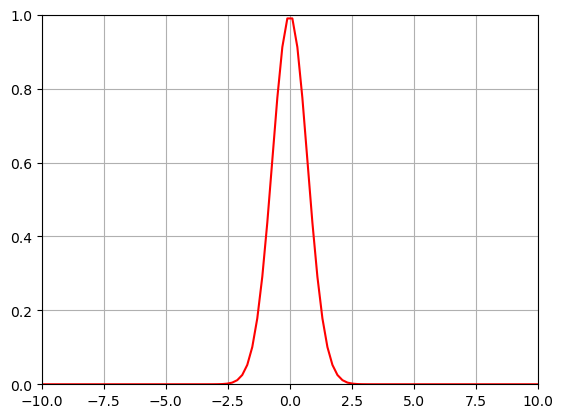

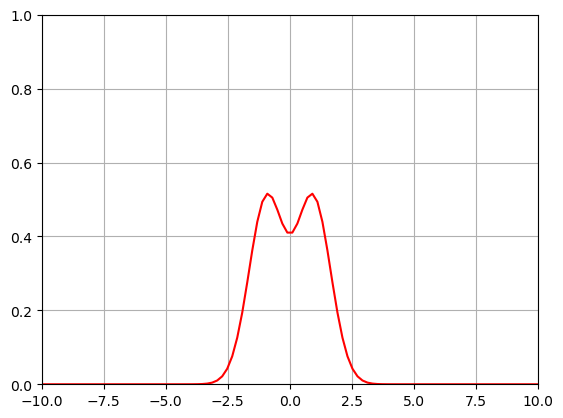

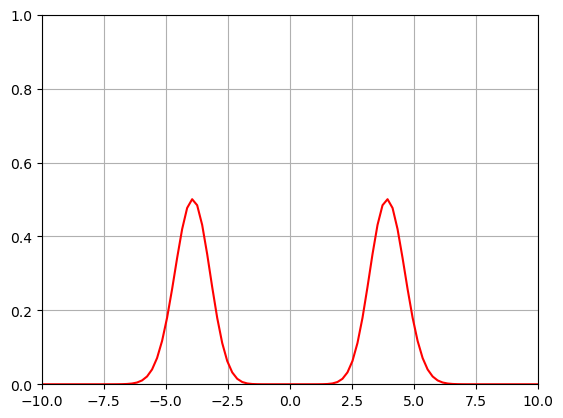

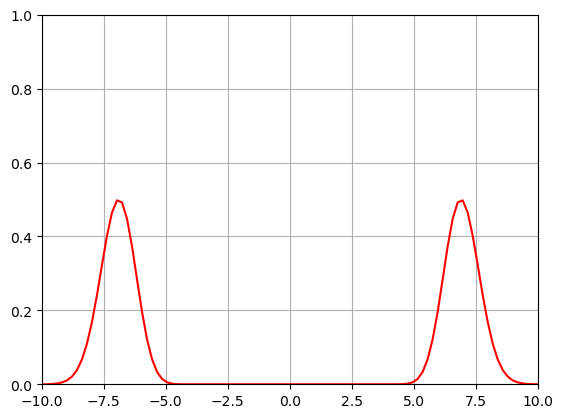

In [81]:
# Temps final des simulations
Tfinal = 8
# Initialisation du temps
temps = 0
# Nombre CFL tel que (0 < CFL <=1)
CFL = 0.5
# Calcul du pas du temps pour assurer la stabilité
dt = round(CFL*dx/c, 2)
print(dt)
beta = c*dt/dx
unew=np.zeros(N)
uu=u

# Initialisation de d'un tableau contenant les solution
tableau_solution_u = np.zeros([N, Tfinal*10+1])
tableau_solution_u[:, 0] =  u
temps = temps + dt
# Initialisation d'un compteur permettant d'indexé la solution à chaque instant t
compteur = 1
tableau_solution_u[:, 1] =  u

#Boucle principale en temps
while (temps < Tfinal):
    for i in range(2,N-1):
        unew[i] = 2*u[i] - uu[i] + beta**2*(u[i-1]-2*u[i]+u[i+1])
    # Conditions aux limites de dirichlet homogène
    unew[0] = 0
    unew[N-1] = 0
    # Incrémentation du temps et mise à jour du tableau u   
    temps = temps + dt
    compteur = compteur + 1

    uu = u.copy()
    u = unew.copy()
    if compteur <= 80:
        tableau_solution_u[:, compteur] = u
    
# Le vecteur correspondant aux temps t = [0, 1, 4, 7]    
Temps = [0, 10, 40, 70]

for i in Temps: 
    # Courbes de u au cours du temps    
    plt.plot(x,tableau_solution_u[:, i],'-r')
    plt.axis([-10,10,0,1])
    plt.grid()
    plt.pause(0.1)


### Test Case 2

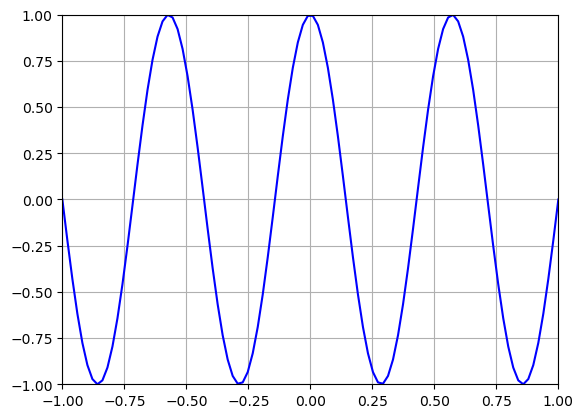

In [82]:
# La longueur L 
L = 1
# Nombre de noeuds du maillage
N = 100
# Le pas du maillage
dx = 2*L/(N-1)
# La vitesse de l'onde
c = 1
# k 
k = 3
# La fonction f(x) de la condition initiale+
def f(x):
    val = np.cos(((2*k + 1)* math.pi * x)/(2*L))
    return val

# Maillage et condition initiale
x = np.linspace(-L,L,N)
u = np.zeros(N)

for i in range(N):
    u[i] = f(x[i])
# Tracé de la condition initiale
plt.plot(x,u,'-b')
plt.axis([-1,1,-1,1])
plt.grid()

0.006349206349206349


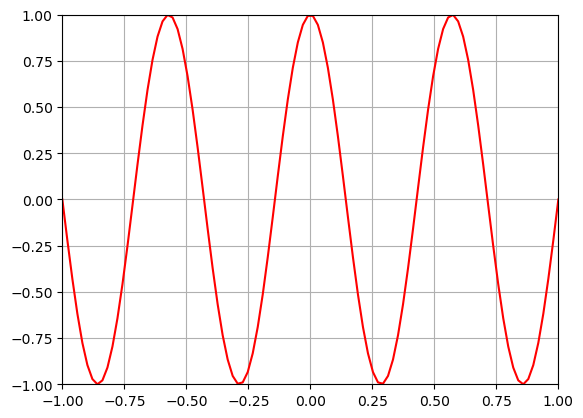

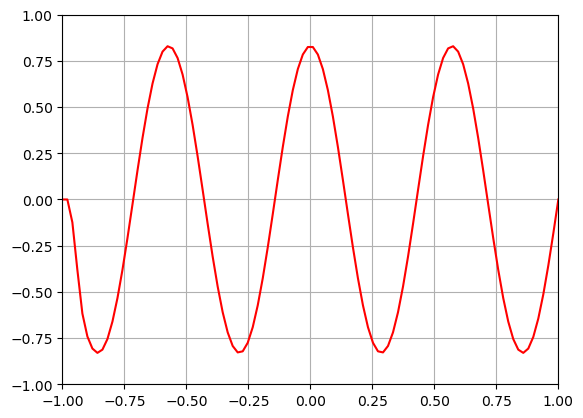

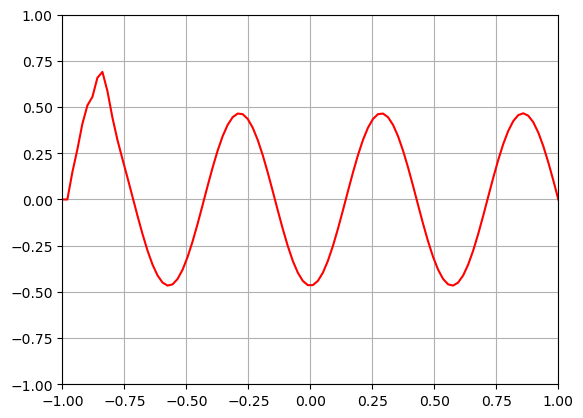

In [83]:
T = 4*L/((2*k + 1)*c)
# Temps final des simulations
Tfinal = 8
# Initialisation du temps
temps = 0
# Nombre CFL tel que (0 < CFL <=1)
CFL = 0.5
# Calcul du pas du temps pour assurer la stabilité
#dt = round(CFL*dx/c, 2)
dt = T/90
print(dt)
beta = c*dt/dx
unew=np.zeros(N)
uu=u

# Initialisation de d'un tableau contenant les solution
tableau_solution_u = np.zeros([N, Tfinal*38])
tableau_solution_u[:, 0] =  u
temps = temps + dt
# Initialisation d'un compteur permettant d'indexé la solution à chaque instant t
compteur = 1
tableau_solution_u[:, 1] =  u

#Boucle principale en temps
while (temps < Tfinal):
    for i in range(2,N-1):
        unew[i] = 2*u[i] - uu[i] + beta**2*(u[i-1]-2*u[i]+u[i+1])
    # Conditions aux limites de dirichlet homogène
    unew[0] = 0
    unew[N-1] = 0
    # Incrémentation du temps et mise à jour du tableau u   
    temps = temps + dt
    compteur = compteur + 1

    uu = u.copy()
    u = unew.copy()
    if compteur <= 80:
        tableau_solution_u[:, compteur] = u
    
    
Temps = [0, 9 , 30]

for i in Temps: 
    # Courbes de u au cours du temps    
    plt.plot(x,tableau_solution_u[:, i],'-r')
    plt.axis([-1,1,-1,1])
    plt.grid()
    plt.pause(0.01)


# Simulation pour le cas 2D

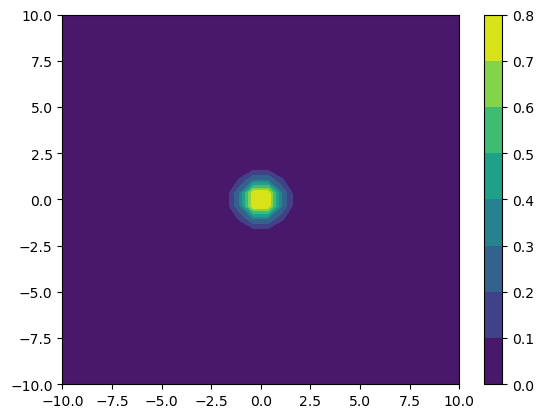

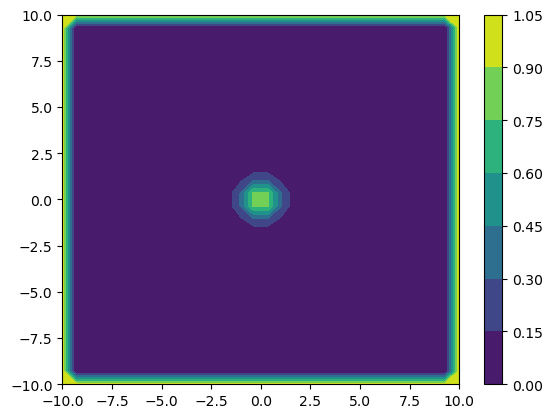

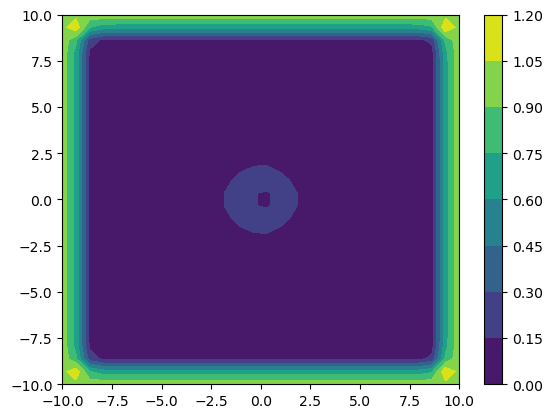

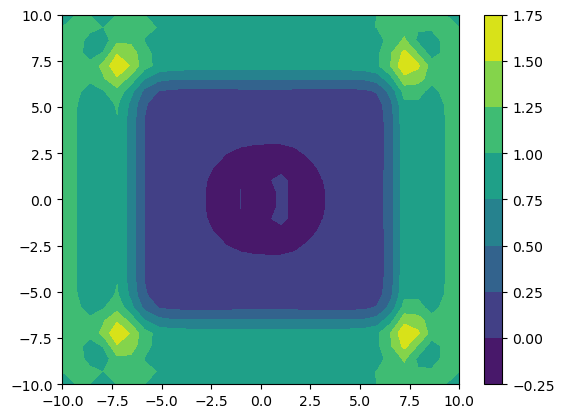

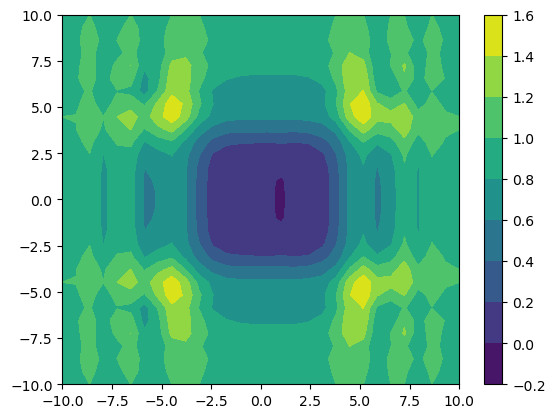

In [84]:
Tfinal = 7
# Longueur et largeur du canal
Lx = 10
Ly = 10
# Nombre de noeuds suivant x et y
Nx = 30
Ny = 30
# Les pas du maillage suivant x et y
dx = 2*Lx/(Nx-1)
dy = 2*Ly/(Ny-1)
# Vitesses de transport
c = 1
# Maillage et condition initiale (on suppose qu'il n'y a pas de polluant à t=0)
x = np.zeros((Nx,Ny))
y = np.zeros((Nx,Ny))
u = np.zeros((Nx,Ny))

#condition initiale
def f_2D(x,y):
    return np.exp(-x**2 -y**2) 

for i in range(Nx):
    for j in range(Ny):
        x[i,j] = -Lx + i*dx
        y[i,j] = -Ly + j*dy
        u[i,j] = f_2D(x[i,j], y[i,j])
        
plt.contourf(x,y,u)
plt.axis([-10,10,-10,10])
plt.colorbar()
plt.show()


# Initialisation du temps
temps = 0
# Choix du pas de temps
dt = 0.1
lam1 = (c*dt/dx)**2
lam2 = (c*dt/dy)**2
uu = np.zeros((Nx,Ny))
unew = np.zeros((Nx,Ny))

#condition initiale de Neumann
uu = u  

# Condition aux limites
uu[:,0] = 1
uu[:,Ny-1] = 1
uu[0,:] = 1
uu[Nx-1,:] = 1

temps = temps + dt

# Initialisation de d'un tableau contenant les solution
tableau_solution_u = np.zeros([Nx, Ny, Tfinal*10+1])
tableau_solution_u[:,:, 0] =  u
#temps = temps + dt
# Initialisation d'un compteur permettant d'indexé la solution à chaque instant t
compteur = 1
tableau_solution_u[:,:,1] =  u

# Boucle principale en temps
while (temps <= Tfinal):
    for i in range(1,Nx-1): 
        for j in range(1,Ny-1):
            unew[i,j] = 2*uu[i,j] - u[i,j] + lam1*(uu[i-1,j] - 2*uu[i,j]  + u[i+1,j]) + lam2*(uu[i,j-1] - 2*uu[i,j]  + uu[i,j+1])
            
    # Condition aux limites
    unew[:,0] = 1
    unew[:,Ny-1] = 1
    unew[0,:] = 1
    unew[Nx-1,:] = 1
    
    # Incrementation du temps
    temps = temps + dt
    compteur = compteur + 1
    
    # mise a jour des u
    u= uu.copy()
    uu = unew.copy()
    if compteur <= 70:
        tableau_solution_u[:,:,compteur] = uu
        
    
Temps = [0, 10 , 40, 70]

for i in Temps:    
    plt.contourf(x,y,tableau_solution_u[:,:,i])
    #plt.axis([-10,10,-10,10])
    plt.colorbar()
    plt.show()
    
    